In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
import pandas as pd
data=pd.read_csv("earthquakes.csv",sep=",")
print(data)


          date  Year  earthquakes_per_year
0   1900-01-01  1900                  13.0
1   1901-01-01  1901                  14.0
2   1902-01-01  1902                   8.0
3   1903-01-01  1903                  10.0
4   1904-01-01  1904                  16.0
..         ...   ...                   ...
94  1994-01-01  1994                  15.0
95  1995-01-01  1995                  25.0
96  1996-01-01  1996                  22.0
97  1997-01-01  1997                  20.0
98  1998-01-01  1998                  16.0

[99 rows x 3 columns]


In [10]:
data=data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  99 non-null     object 
 1   Year                  99 non-null     int64  
 2   earthquakes_per_year  99 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
None


In [11]:
#define data
x = [22, 24, 25, 25, 28, 29, 34, 37, 40, 44, 51, 48, 47, 50, 51]

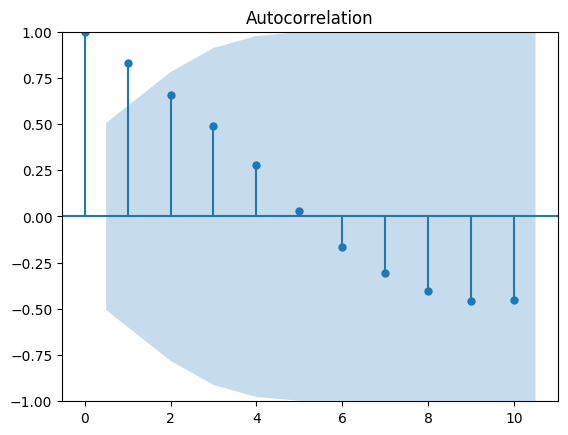

In [12]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(x, lags=10)
plt.show()

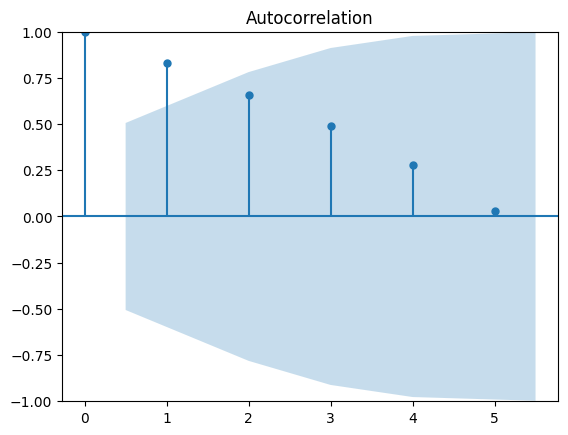

In [13]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(x, lags=5)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: ignored

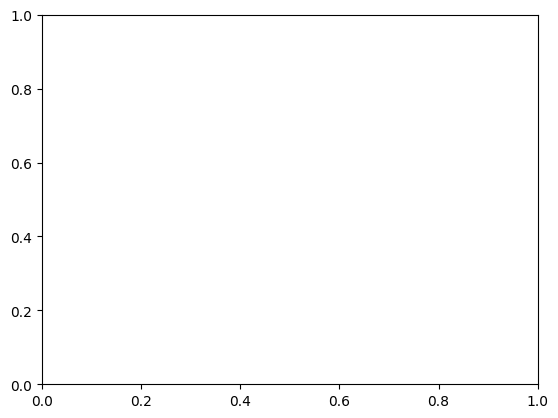

In [15]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = read_csv('earthquakes.csv', header=0, index_col=0)
plot_pacf(series, lags=50)
pyplot.show()

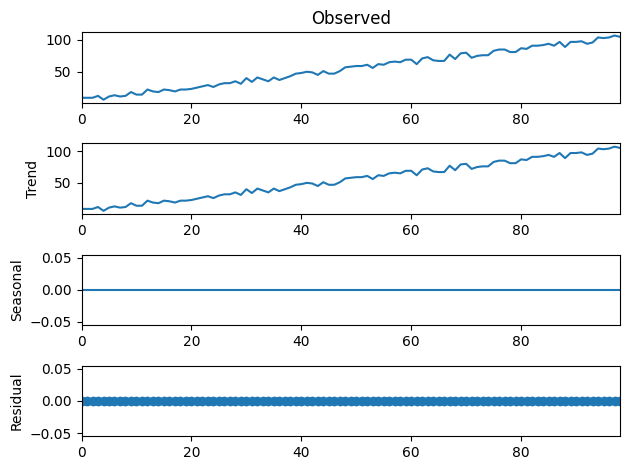

In [16]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

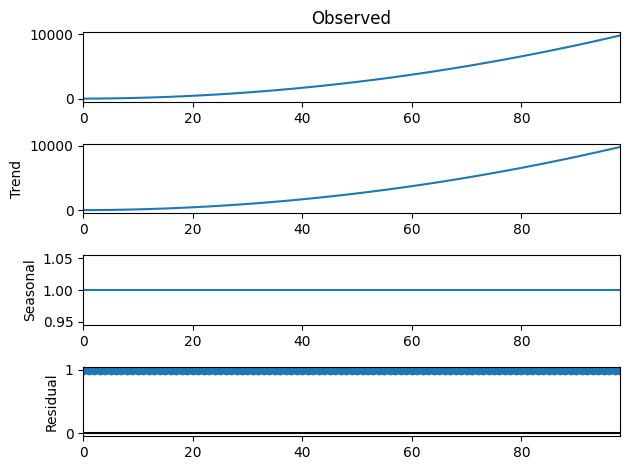

In [17]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

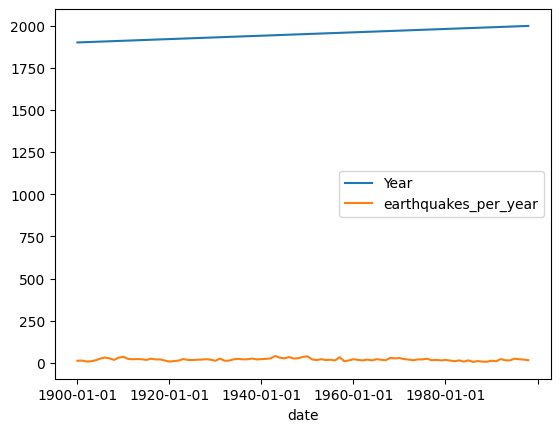

In [18]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('earthquakes.csv', header=0, index_col=0)
series.plot()
pyplot.show()

In [19]:
pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.1 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.18.1-py3-none-any.whl size=109695 sha256=93294c7990e8f64c5eabe8ec4d8c45dab5ad5b59442b3d3532bde2b87be6c636
  Stored in directory: /root/.cache/pip/wheels/8c/ee/27/2c315bf4ddd3f52b27e6e8583e31aa362f365764be7c3668de
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=a265cb528b550354a9b70dfebc1aaf157ff568ce34a82cb96a7c1b2c1851a5bb
  

In [20]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [ ]:
df = pd.read_csv('earthquakes.csv')
f = Forecaster(y=df['#earthquakes'],current_dates=df['Month'])

In [21]:
f.generate_future_dates(12) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

NameError: ignored

In [22]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from scalecast.auxmodels import auto_arima

In [24]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('earthquakes.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=640.692, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=660.840, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=648.817, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=639.036, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=658.842, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=640.580, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=640.728, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=637.076, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=638.727, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=638.615, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=646.823, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=638.769, Time=0.25 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.982 seconds
                               SARIMAX Results                                
Dep. Variable:       

In [25]:
auto_arima(
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

TypeError: ignored

In [26]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

NameError: ignored